In [4]:
import csv
import math

with open('sales_24.csv', 'r') as infile, \
     open('sales_updated.csv', 'w', newline='') as outfile:
    
    reader = csv.DictReader(infile)
    writer = csv.DictWriter(outfile, fieldnames=reader.fieldnames)
    writer.writeheader()
    
    for row in reader:
        try:
            row['Amount'] = str(math.floor(float(row['Amount'])))
        except (ValueError, TypeError):
            pass  
        
        writer.writerow(row)


In [6]:
df = pd.read_csv("sales_updated.csv")
df

,Date,Region,Product,Amount,Customer ID
0,2024-01-07,North,D1-Shirt,1000.0,C001
1,15/01/2024,EAst,G2-Blazers,1200.0,C004
2,24/2/20,SOUTH,K3-Trousers,1500.0,C003
3,2024-02-13,West,D1Shirt,2000.0,C002
4,2024-03-19,South,D1-Shirt,NaN,C003
5,13/3/24,NaN,G2-Blazers,1800.0,C001
6,2024-04-03,South,K3-Trousers,NaN,C002
7,21/04/2024,East,G2-Blazers,2500.0,C004
8,2024-05-15,West,K3-Trousers,1500.0,C001
9,27/5/24,North,K3-Trousers,1500.0,C004


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("

# --- Clean Region ---
df['Region'] = df['Region'].str.strip().str.title()

# Get the valid region where Blazers are sold
blazer_rows = df[df['Product'].str.contains('Blazers', case=False, na=False)]
blazer_region = blazer_rows['Region'].dropna().mode()[0]

# Fill missing Region values for Blazers
df.loc[df['Region'].isna() & df['Product'].str.contains('Blazers', case=False, na=False), 'Region'] = blazer_region


/home/nineleaps/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


PyperclipException: 
    Pyperclip could not find a copy/paste mechanism for your system.
    For more information, please visit
    https://pyperclip.readthedocs.io/en/latest/index.html#not-implemented-error
    

In [8]:
# Fix inconsistent dates
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
df['Month'] = df['Date'].dt.month_name()

# Group by month
monthly_sales = df.groupby('Month')['Amount'].sum().sort_values(ascending=False)
print("Month with highest sales:\n", monthly_sales.head(1))


Month with highest sales:
 Month
July    1000.0
Name: Amount, dtype: float64


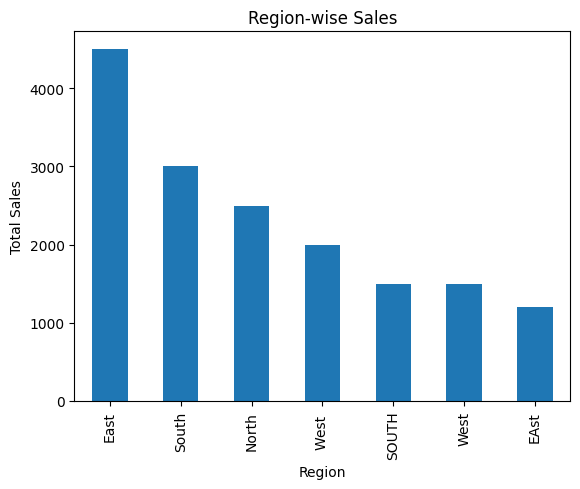

In [9]:
region_sales = df.groupby('Region')['Amount'].sum().sort_values(ascending=False)
region_sales.plot(kind='bar', title='Region-wise Sales')
plt.ylabel("Total Sales")
plt.show()


In [ ]:
monthly_sales.plot(kind='bar', title='Month-wise Sales')
plt.ylabel("Total Sales")
plt.show()
